In [1]:
%matplotlib inline

import numpy as np
import joblib
from collections import defaultdict

from dlaClass import DLA

### Loading data from simulations

In [2]:
kVals = ["0.038394755", "0.03710528", "0.035815805", "0.03452633", "0.033236855", "0.03194738", \
         "0.030657905", "0.02936843", "0.028078955", "0.02678948", "0.02421053", "0.025500005", \
         "0.022921055", "0.020342115", "0.02163158", "0.017763175", "0.01905265", "0.0164737",  \
         "0.01389475", "0.015184225", "0.04742108", "0.048710555", "0.05", "0.04226318",        \
         "0.043552655", "0.04484213", "0.046131605", "0.03968423", "0.040973705", "0.001",      \
         "0.002289475", "0.00357895", "0.004868425", "0.0061579", "0.007447375", "0.00873685",  \
         "0.0113158", "0.010026325", "0.012605275"]

kVals = sorted(kVals, key = lambda x: float(x))
fileNames = map(lambda x : 'logFiles/dla_' + x + '.log', kVals) + \
            map(lambda x : 'logFiles2/dla_' + x + '.log', kVals)

saTable = defaultdict(lambda : defaultdict(list)) # (n, k) : [sa, ...]
for fi in fileNames:
    with open(fi, 'r') as fp:
        data = fp.readlines()
        data = map(lambda x : eval(x.strip('\n')), data)
        
    for point in data:
        saTable[point['n']][point['k']].append(point['sa'])
        
for n in saTable.keys():
    if n > 20000:
        del saTable[n]
        continue
        
    for k, val in saTable[n].iteritems():
        saTable[n][k] = np.mean(val) / n

In [3]:
allData = [sorted(saTable[n].items(), key = lambda x : x[0]) for n in range(100, 20001, 100)]
allX = np.array(reduce(lambda a, b : a + b, map(lambda x : map(lambda y : y[1], x), allData)))
ally = np.array(reduce(lambda a, b : a + b, map(lambda x : map(lambda y : np.log2(y[0]), x), allData)))
allX.shape, ally.shape

((7800,), (7800,))

### Estimation function (All data)

In [4]:
def makeKEstimationAllData(filePath, size):

    dla = DLA(size, 1)
    dla.loadState(filePath)
    dla.printState()
    
    n = dla.state[dla.state == 1].shape[0] # Count number of particles
    averageSA = float(dla.getSurfaceArea()) / n
        
    # Fit polynomial
    coeffs = np.polyfit(allX, ally, 3)
    f = np.poly1d(coeffs)
    
    # Make prediction
    pred = f(averageSA)
    
    return 2 ** pred


### Estimation function (window regressor)

In [5]:
def makeKEstimationWindow(filePath, size):

    dla = DLA(size, 1)
    dla.loadState(filePath)
    dla.printState()
    
    n = dla.state[dla.state == 1].shape[0] # Count number of particles
    averageSA = float(dla.getSurfaceArea()) / n
        
    # Select window to fit polynomial
    n = (n / 100) * 39   # Round to nearest 100
    left  = max(0, n - 10 * 39)
    right = n + 10 * 39
    
    # No simulation data available, take last window
    if n >= allX.shape[0]:
        left = allX.shape[0] - 20 * 39
        
    # Extract data to fit polynomial
    trainX = allX[left : right]
    trainy = ally[left : right]
    
    # Fit polynomial
    coeffs = np.polyfit(trainX, trainy, 3)
    f = np.poly1d(coeffs)
    
    # Make prediction
    pred = f(averageSA)
    
    return 2 ** pred


### (I) Test File aggregate_500_6789_0.0255.np
#### `size` = 500, `n` = 6789, `k` = 0.0255

Using all data
True : 0.0255
Estimated : 0.0279192310924
Error in estimate : 0.00241923109244
Percentage of range : 4.9372063111 %
--------------------------------
Using window
True : 0.0255
Estimated : 0.0273748172059
Error in estimate : 0.00187481720592
Percentage of range : 3.8261575631 %
--------------------------------


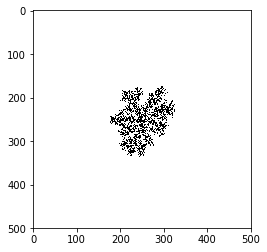

In [6]:
estimated = makeKEstimationAllData('aggregateSamples/aggregate_500_6789_0.0255.np', 500)
trueK = 0.0255
print 'Using all data'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

estimated = makeKEstimationWindow('aggregateSamples/aggregate_500_6789_0.0255.np', 500)
trueK = 0.0255
print 'Using window'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

### (II) Test File aggregate_500_7890_0.0255.np
#### `size` = 500, `n` = 7890, `k` = 0.0255

Using all data
True : 0.0255
Estimated : 0.0236981204812
Error in estimate : 0.0018018795188
Percentage of range : 3.67730514041 %
--------------------------------
Using window
True : 0.0255
Estimated : 0.023524406528
Error in estimate : 0.00197559347205
Percentage of range : 4.03182341235 %
--------------------------------


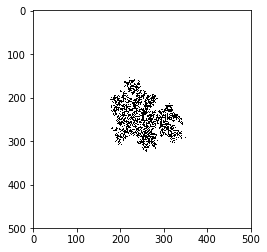

In [7]:
estimated = makeKEstimationAllData('aggregateSamples/aggregate_500_7890_0.0255.np', 500)
trueK = 0.0255
print 'Using all data'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

estimated = makeKEstimationWindow('aggregateSamples/aggregate_500_7890_0.0255.np', 500)
trueK = 0.0255
print 'Using window'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

### (III) Test File aggregate_500_9500_0.04.np
#### `size` = 500, `n` = 9500, `k` = 0.04

Using all data
True : 0.04
Estimated : 0.0357880665533
Error in estimate : 0.0042119334467
Percentage of range : 8.59578254428 %
--------------------------------
Using window
True : 0.04
Estimated : 0.0359794604581
Error in estimate : 0.00402053954189
Percentage of range : 8.20518273856 %
--------------------------------


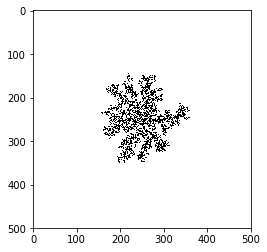

In [8]:
estimated = makeKEstimationAllData('aggregateSamples/aggregate_500_9500_0.04.np', 500)
trueK = 0.04
print 'Using all data'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

estimated = makeKEstimationWindow('aggregateSamples/aggregate_500_9500_0.04.np', 500)
trueK = 0.04
print 'Using window'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

### (IV) Test File aggregate_500_19500_0.04.np
#### (No data available for n = 19500. Estimatation is still good)
#### `size` = 500, `n` = 19500, `k` = 0.04

Using all data
True : 0.04
Estimated : 0.0365141505717
Error in estimate : 0.0034858494283
Percentage of range : 7.11397842509 %
--------------------------------
Using window
True : 0.04
Estimated : 0.0369268882965
Error in estimate : 0.00307311170355
Percentage of range : 6.27165653785 %
--------------------------------


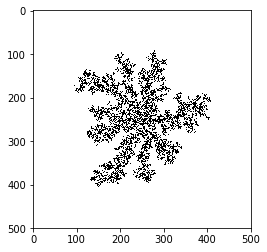

In [9]:
estimated = makeKEstimationAllData('aggregateSamples/aggregate_500_19500_0.04.np', 500)
trueK = 0.04
print 'Using all data'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

estimated = makeKEstimationWindow('aggregateSamples/aggregate_500_19500_0.04.np', 500)
trueK = 0.04
print 'Using window'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

### (V) Test File aggregate_500_29500_0.04.np
#### (No data available for n = 29500. Estimatation is still good)
#### `size` = 500, `n` = 29500, `k` = 0.04


Using all data
True : 0.04
Estimated : 0.0379416087369
Error in estimate : 0.00205839126314
Percentage of range : 4.2007984962 %
--------------------------------
Using window
True : 0.04
Estimated : 0.0387947175138
Error in estimate : 0.00120528248617
Percentage of range : 2.45976017585 %
--------------------------------


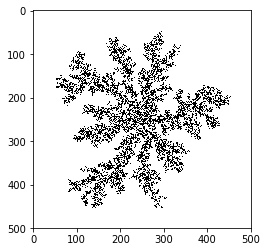

In [10]:
estimated = makeKEstimationAllData('aggregateSamples/aggregate_500_29500_0.04.np', 500)
trueK = 0.04
print 'Using all data'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'

estimated = makeKEstimationWindow('aggregateSamples/aggregate_500_29500_0.04.np', 500)
trueK = 0.04
print 'Using window'
print 'True :', trueK
print 'Estimated :', estimated
print 'Error in estimate :', np.abs(trueK - estimated) 
print 'Percentage of range :', np.abs(trueK - estimated)/ (5e-2 - 1e-3) * 100,'%'
print '--------------------------------'